#Tratamento de Dados - Trabalho Final - Inteligência Computacional

Gabriel Schrader Vilas Boas, RA: 150981

João Pedro Assumpção Evaristo. RA: 148887

##Importando o dataset 

O dataset utilizado para o trabalho se encontra no site [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).
Primeiramente, é necessario carregar o dataset e armazené-lo em uma variável que será utilizada para fazer as operações.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/joao-evaristo/Trabalho_Final_IC/main/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Remocao de colunas que não serão utilizadas

In [ ]:
# Remocao de colunas que nao serao
# utilizadas pelos algoritmos aplicados.

data.pop('id')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Discretização dos Dados

 Discretização de dados que ainda não possuem forma numérica/tratével, de forma que possamos aplicar os algoritmos de forma prática.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['ever_married'] = le.fit_transform(data['ever_married'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['gender'] = le.fit_transform(data['gender'])
data['work_type'] = le.fit_transform(data['work_type'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


##Dados faltantes: Preenche-los ou Removê-los?

A seguir, iremos fazer uma copia para separar um caso aonde o dataset tem as amostras com dados faltantes removidos e outra com esses dados preenchidos. Mais adiante, iremos comparar qual abordagem é a melhor.

Primeiro, é importante saber quanto são os dados faltantes.

In [ ]:
print(data.isnull().sum())  # descobre-se quais colunas possuem dados faltantes

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Agora podemos fazer a separação.

In [ ]:
# copia o csv
filled_data = data.copy()

# remove os dados faltantes do data original
data_clean = data.copy()
data_clean.dropna(inplace=True)

# obtendo valor medio de 'bmi' para futuro preenchimento
mean = filled_data['bmi'].mean()

# preenchimento dos NaNs com as médias
filled_data['bmi'].fillna(value=mean, inplace=True)

X_filled = filled_data.drop('stroke', axis=1)
y_filled = filled_data['stroke']

X_clean = data_clean.drop('stroke',axis=1)
y_clean = data_clean['stroke']

##Como os dados estão distribuidos?

Hora de compararmos os dados em que há derrame e aqueles em que não houve derrame. Caso haja um desbalanço, podemos aplicar técnicas de sampling.

cenario antes do sampling
0    3288
1     148
Name: stroke, dtype: int64


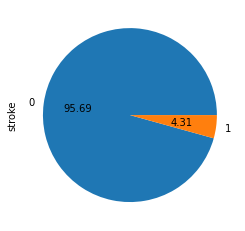

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Clean, X_test_Clean, y_train_Clean, y_test_Clean = train_test_split(X_clean, y_clean, test_size=0.30) # Separacao dos dados de treino e teste
print("cenario antes do sampling")
print(y_train_Clean.value_counts())
y_train_Clean.value_counts().plot.pie(autopct='%.2f')

Aqui, é um cenário no qual são mostrados os dados antes do sampling no dataset com os dados preenchidos de maneira sintética. 

cenario (dados preenchidos) antes do oversampling
0    3401
1     176
Name: stroke, dtype: int64


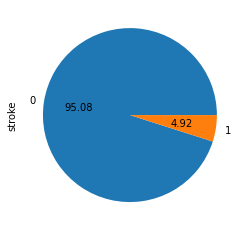

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Filled, X_test_Filled, y_train_Filled, y_test_Filled= train_test_split(X_filled, y_filled, test_size=0.30) # Separacao dos dados de treino e teste
print("cenario (dados preenchidos) antes do oversampling")
print(y_train_Filled.value_counts())
y_train_Filled.value_counts().plot.pie(autopct='%.2f')

##Oversampling

Como se pode observar, há uma dominância quase total de casos em que não houve derrame. Assim, começaremos o balanceamento aplicando uma técnica de overmsampling.

cenario pos oversampling
0    3288
1    3288
Name: stroke, dtype: int64


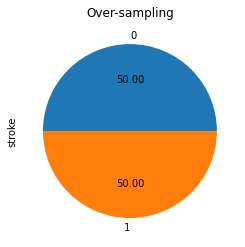

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X_train_Clean, y_train_Clean)
print("cenario pos oversampling")
print(y_res.value_counts())
# Atualiza os dados com o oversampling
data_clean_over = pd.concat([X_res.reset_index(), y_res.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
X_train_Clean_over = X_res
y_train_Clean_over = y_res

cenario pos oversampling (dados preenchidos)
0    3401
1    3401
Name: stroke, dtype: int64


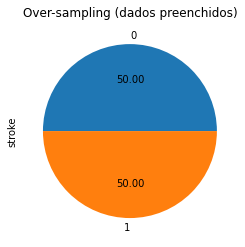

In [ ]:
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X_train_Filled, y_train_Filled)
print("cenario pos oversampling (dados preenchidos)")
print(y_res.value_counts())
# Atualiza os dados com o oversampling
filled_data_over = pd.concat([X_res.reset_index(), y_res.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling (dados preenchidos)")
X_train_Filled_over = X_res
y_train_Filled_over = y_res

##Undersampling

Outra estratégia para o balanceamento de dados é o undersampling. Também iremos utilizar desse modo de balanceamento e, posteriormente, iremos analisar qual a melhor técnica.

cenario pos undersampling
0    148
1    148
Name: stroke, dtype: int64


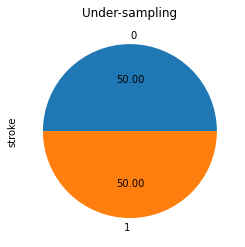

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X_train_Clean, y_train_Clean)
print("cenario pos undersampling")
print(y_res.value_counts())
# Atualiza os dados com o undersampling
data_clean_under = pd.concat([X_res.reset_index(), y_res.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
X_train_Clean_under = X_res
y_train_Clean_under = y_res

cenario pos undersampling (dados preenchidos)
0    176
1    176
Name: stroke, dtype: int64


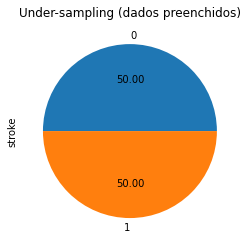

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X_train_Filled, y_train_Filled)
print("cenario pos undersampling (dados preenchidos)")
print(y_res.value_counts())
# Atualiza os dados com o oversampling
filled_data_under = pd.concat([X_res.reset_index(), y_res.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling (dados preenchidos)")
X_train_Filled_under = X_res
y_train_Filled_under = y_res

##Remoção de outliers

Agora, vamos realizar a remoção de valores que são extremos em nosso dataset, isto é, possuem valores que não auxiliarão no processo de classificação pois não seguem o comportamento "dentro do normal" dos outros dados.

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=1000, contamination=0.03)
outs = pd.Series(iso.fit_predict(data_clean_over[['bmi', 'avg_glucose_level']]),
                 name='outliers')
print(outs.value_counts())

data_clean_over = pd.concat([outs.reset_index(), data_clean_over.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
data_clean_over = data_clean_over[data_clean_over['outliers'] == 1]
data_clean_over.pop('outliers')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    6378
-1     198
Name: outliers, dtype: int64


0       1
1       1
2       1
3       1
4       1
       ..
6571    1
6572    1
6573    1
6574    1
6575    1
Name: outliers, Length: 6378, dtype: int64

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=1000, contamination=0.03)
outs = pd.Series(iso.fit_predict(data_clean_under[['bmi', 'avg_glucose_level']]),
                 name='outliers')
print(outs.value_counts())

data_clean_under = pd.concat([outs.reset_index(), data_clean_under.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
data_clean_under = data_clean_under[data_clean_under['outliers'] == 1]
data_clean_under.pop('outliers')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    287
-1      9
Name: outliers, dtype: int64


0      1
1      1
2      1
3      1
4      1
      ..
291    1
292    1
293    1
294    1
295    1
Name: outliers, Length: 287, dtype: int64

In [ ]:
iso = IsolationForest(n_estimators=1000, contamination=0.03)
outs = pd.Series(iso.fit_predict(filled_data_over[['bmi', 'avg_glucose_level']]),
                 name='outliers')
print(outs.value_counts())

filled_data_over = pd.concat([outs.reset_index(), filled_data_over.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
filled_data_over = filled_data_over[filled_data_over['outliers'] == 1]
filled_data_over.pop('outliers')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    6597
-1     205
Name: outliers, dtype: int64


0       1
1       1
2       1
3       1
4       1
       ..
6797    1
6798    1
6799    1
6800    1
6801    1
Name: outliers, Length: 6597, dtype: int64

In [ ]:
iso = IsolationForest(n_estimators=1000, contamination=0.03)
outs = pd.Series(iso.fit_predict(filled_data_under[['bmi', 'avg_glucose_level']]),
                 name='outliers')
print(outs.value_counts())

filled_data_under = pd.concat([outs.reset_index(), filled_data_under.reset_index()], axis=1,
                 ignore_index=False).drop(columns='index')
filled_data_under = filled_data_under[filled_data_under['outliers'] == 1]
filled_data_under.pop('outliers')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    341
-1     11
Name: outliers, dtype: int64


0      1
1      1
2      1
3      1
4      1
      ..
347    1
348    1
349    1
350    1
351    1
Name: outliers, Length: 341, dtype: int64

In [ ]:
#Atulizacao de variaveis

X_filled_over = filled_data_over.drop('stroke', axis=1)
y_filled_over = filled_data_over['stroke']

X_clean_over = data_clean_over.drop('stroke',axis=1)
y_clean_over = data_clean_over['stroke']

X_filled_under = filled_data_under.drop('stroke', axis=1)
y_filled_under = filled_data_under['stroke']

X_clean_under = data_clean_under.drop('stroke',axis=1)
y_clean_under = data_clean_under['stroke']

##Comparações: Base limpa ou Base Preenchida? Oversampling ou Undersampling?

A seguir, faremos simples comparações com o algoritmo RandomForest para analisar se, com a remoção dos dados faltantes, o resultado final será pior do que com o preenchimento de valores sintéticos para substituir os NaN. Também, é possível plotar a matrix de confusão, para tornar observável os erros que as abordagens cometem na hora da predição.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

filled_data_over_accuracies = []
filled_data_under_accuracies = []
data_over_accuracies = []
data_under_accuracies = []
numTests = 5

# testes dados preenchidos oversampling
for i in range(numTests):
  X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filled_over, y_filled_over, test_size=0.30)# Separando teste e treino
  model_filled_over = RandomForestClassifier()
  model_filled_over.fit(X_train_f, y_train_f)
  prediction = model_filled_over.predict(X_test_Filled)
  filled_data_over_accuracies.append(recall_score(y_test_Filled, prediction, average='macro'))

# testes dados preenchidos undersampling
for i in range(numTests):
  X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filled_under, y_filled_under, test_size=0.30)# Separando teste e treino
  model_filled_under = RandomForestClassifier()
  model_filled_under.fit(X_train_f, y_train_f)
  prediction = model_filled_under.predict(X_test_Filled)
  filled_data_under_accuracies.append(recall_score(y_test_Filled, prediction, average='macro'))

# testes dados não preenchidos oversampling
for i in range(numTests):
  X_train, X_test, y_train, y_test = train_test_split(X_clean_over, y_clean_over, test_size=0.30)# Separando teste e treino
  model_over = RandomForestClassifier()
  model_over.fit(X_train, y_train)
  prediction = model_over.predict(X_test_Clean)
  data_over_accuracies.append(recall_score(y_test_Clean, prediction, average='macro'))

# testes dados não preenchidos undersampling
for i in range(numTests):
  X_train, X_test, y_train, y_test = train_test_split(X_clean_under, y_clean_under, test_size=0.30)# Separando teste e treino
  model_under = RandomForestClassifier()
  model_under.fit(X_train, y_train)
  prediction = model_under.predict(X_test_Clean)
  data_under_accuracies.append(recall_score(y_test_Clean, prediction, average='macro'))

# comparação das acurácias médias para 5 rodadas do algoritmo
print("Acurácia média com os dados preenchidos (over): ", "{:.2f}".format(100 * (sum(filled_data_over_accuracies) / len(filled_data_over_accuracies))), "%.")
print("Acurácia média com os dados preenchidos (under): ", "{:.2f}".format(100 * (sum(filled_data_under_accuracies) / len(filled_data_under_accuracies))), "%.")
print("Acurácia média com os dados removidos (over): ", "{:.2f}".format(100 * (sum(data_over_accuracies) / len(data_over_accuracies))), "%.")
print("Acurácia média com os dados removidos (under): ", "{:.2f}".format(100 * (sum(data_under_accuracies) / len(data_under_accuracies))), "%.")

Acurácia média com os dados preenchidos (over):  52.64 %.
Acurácia média com os dados preenchidos (under):  75.34 %.
Acurácia média com os dados removidos (over):  52.80 %.
Acurácia média com os dados removidos (under):  77.48 %.


dados preenchidos (over)
[[1430   30]
 [  67    6]]
dados preenchidos (under)
[[915 545]
 [  7  66]]
dados removidos (over)
[[1394   18]
 [  57    4]]
dados removidos (under)
[[988 424]
 [ 10  51]]


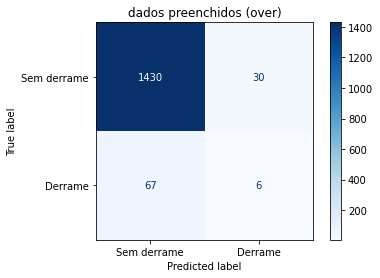

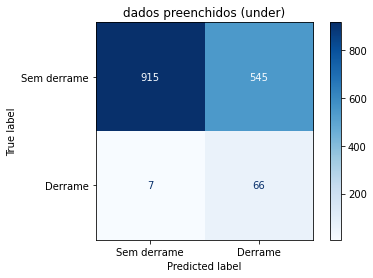

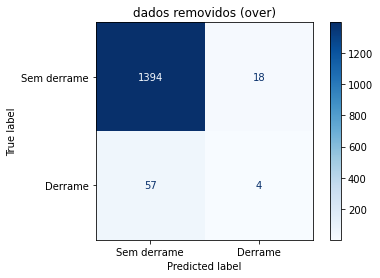

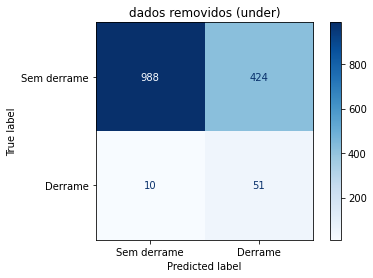

In [ ]:
# plot das matrizes de confusão
titles_options = [("dados preenchidos (over)", model_filled_over, X_test_Filled, y_test_Filled),
                  ("dados preenchidos (under)", model_filled_under, X_test_Filled, y_test_Filled),
                  ("dados removidos (over)", model_over, X_test_Clean, y_test_Clean),
                  ("dados removidos (under)", model_under, X_test_Clean, y_test_Clean)]
                  
for title, model, aux_test_x, aux_test_y in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        aux_test_x,
        aux_test_y,
        display_labels=['Sem derrame', 'Derrame'],
        cmap=plt.cm.Blues,
        normalize= None,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Com a análise feita acima, podemos concluir que a o melhor cenario para a aprendizagem dos modelos é aquele em que os dados foram removidos e foi aplicado o undersampling. É uma abordagem que, apesar de cometer falsos positivos nos casos em que não há derrame, obteve um melhor resultado no geral.

In [ ]:
data = data_clean_under.copy()
X = X_clean_under
y = y_clean_under
X_test = X_test_Clean
y_test = y_test_Clean

##Importância de cada feature para o resultado final

Agora, com os dados devidamente balanceados, podemos verificar a relação e a sua importância entre as features e os casos de derrame. Para isso, vamos começar utilizando o método feature_importances.

age: 0.44221999910959703
avg_glucose_level: 0.18373369813864343
bmi: 0.13250008276643171
smoking_status: 0.05816830783917558
work_type: 0.04989001435795133
heart_disease: 0.031045590150470374
ever_married: 0.026790797350085643
hypertension: 0.02553015212197595
gender: 0.025345386093879676
Residence_type: 0.024775972071789356


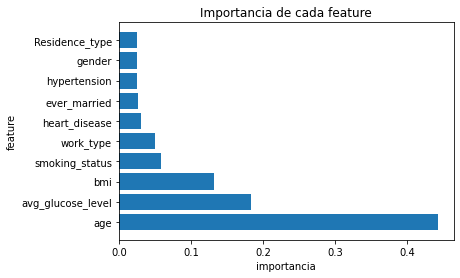

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.30, random_state=42)# Separando teste e treino
model = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
importance_list = model.feature_importances_
importance_dict = {}
for i, importance in enumerate(importance_list):
    importance_dict[data.columns[i]] = importance

importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
y_axis = []
x_axis = []
for feature in importance_dict:
  print(f'{feature}: {importance_dict[feature]}')
  y_axis.append(feature)
  x_axis.append(importance_dict[feature])
plt.barh(y_axis, x_axis)
plt.title('Importancia de cada feature')
plt.ylabel('feature')
plt.xlabel('importancia')
plt.show()



Segundo esse modelo, as features mais importantes seriam: age, avg_glucose_level e bmi. As demais apresentam baixo impacto.

###Heatmap

Também podemos utilizar o Heatmap de correlações para visualizar o nível de relação entre uma feature e ocorrência - ou não ocorrência - do avc.

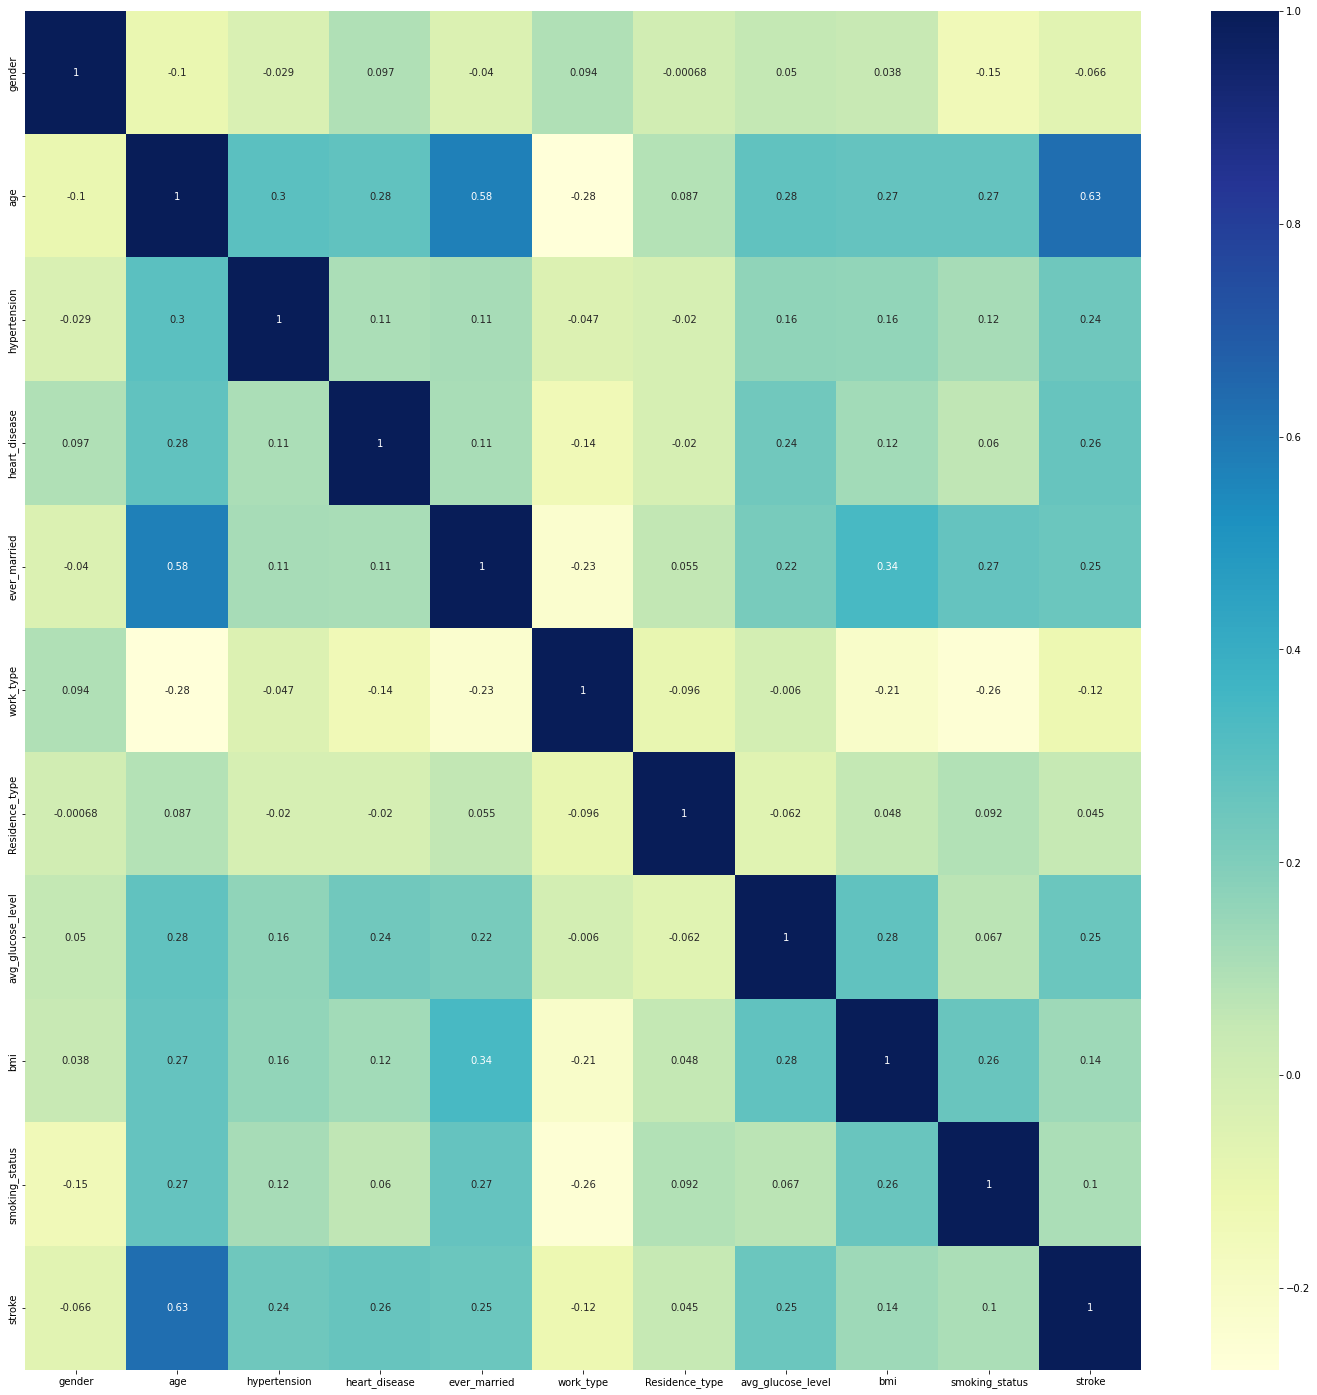

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# HeatMap das features
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

Nesse caso, é possível ver que há um destaque para age, heart_disease, ever married, hypertersion, avg_glucose_level e bmi.

###Árvore de Decisão

A seguir, podemos comparar os critérios de decisão de uma árvore de decisão para saber quais dados são mais importantes para separação dos níveis subsequentes. Primeiramente, vamos fazer uma comparação entre os critérios gini e entropy da Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
score_gini = []
score_entropy = []
numTests = 100


for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.30)# Separando teste e treino
  clf = DecisionTreeClassifier(criterion = 'gini')
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_test)
  score = recall_score(y_test, prediction, average='macro')
  score_gini.append(score)
  clf = DecisionTreeClassifier(criterion = 'entropy')
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_test)
  score = recall_score(y_test, prediction, average='macro')
  score_entropy.append(score)


print(f'Acuracia media gini = {100 * (sum(score_gini) / len(score_gini))}')
print(f'Acuracia media entropy = {100 * (sum(score_entropy) / len(score_entropy))}')

Acuracia media gini = 70.87010634839548
Acuracia media entropy = 71.08724399758509


Como o resultado médio da árvore de decisão com o uso da entropy foi melhor, vamos optar por ele. Para ver as features mais importantes, basta observar a topologia mais alta da árvore. Com isso, limitaremos a altura máxima da árvore em 4.

[Text(0.39285714285714285, 0.9, 'age <= 48.5\nentropy = 0.997\nsamples = 200\nvalue = [106, 94]'),
 Text(0.14285714285714285, 0.7, 'avg_glucose_level <= 58.235\nentropy = 0.36\nsamples = 73\nvalue = [68, 5]'),
 Text(0.07142857142857142, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21428571428571427, 0.5, 'age <= 37.5\nentropy = 0.253\nsamples = 71\nvalue = [68, 3]'),
 Text(0.14285714285714285, 0.3, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.2857142857142857, 0.3, 'avg_glucose_level <= 94.095\nentropy = 0.592\nsamples = 21\nvalue = [18, 3]'),
 Text(0.21428571428571427, 0.1, '\n  (...)  \n'),
 Text(0.35714285714285715, 0.1, '\n  (...)  \n'),
 Text(0.6428571428571429, 0.7, 'age <= 72.5\nentropy = 0.88\nsamples = 127\nvalue = [38, 89]'),
 Text(0.5, 0.5, 'avg_glucose_level <= 58.895\nentropy = 0.98\nsamples = 79\nvalue = [33, 46]'),
 Text(0.42857142857142855, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5714285714285714, 0.3, 'ever_married <= 0.5\

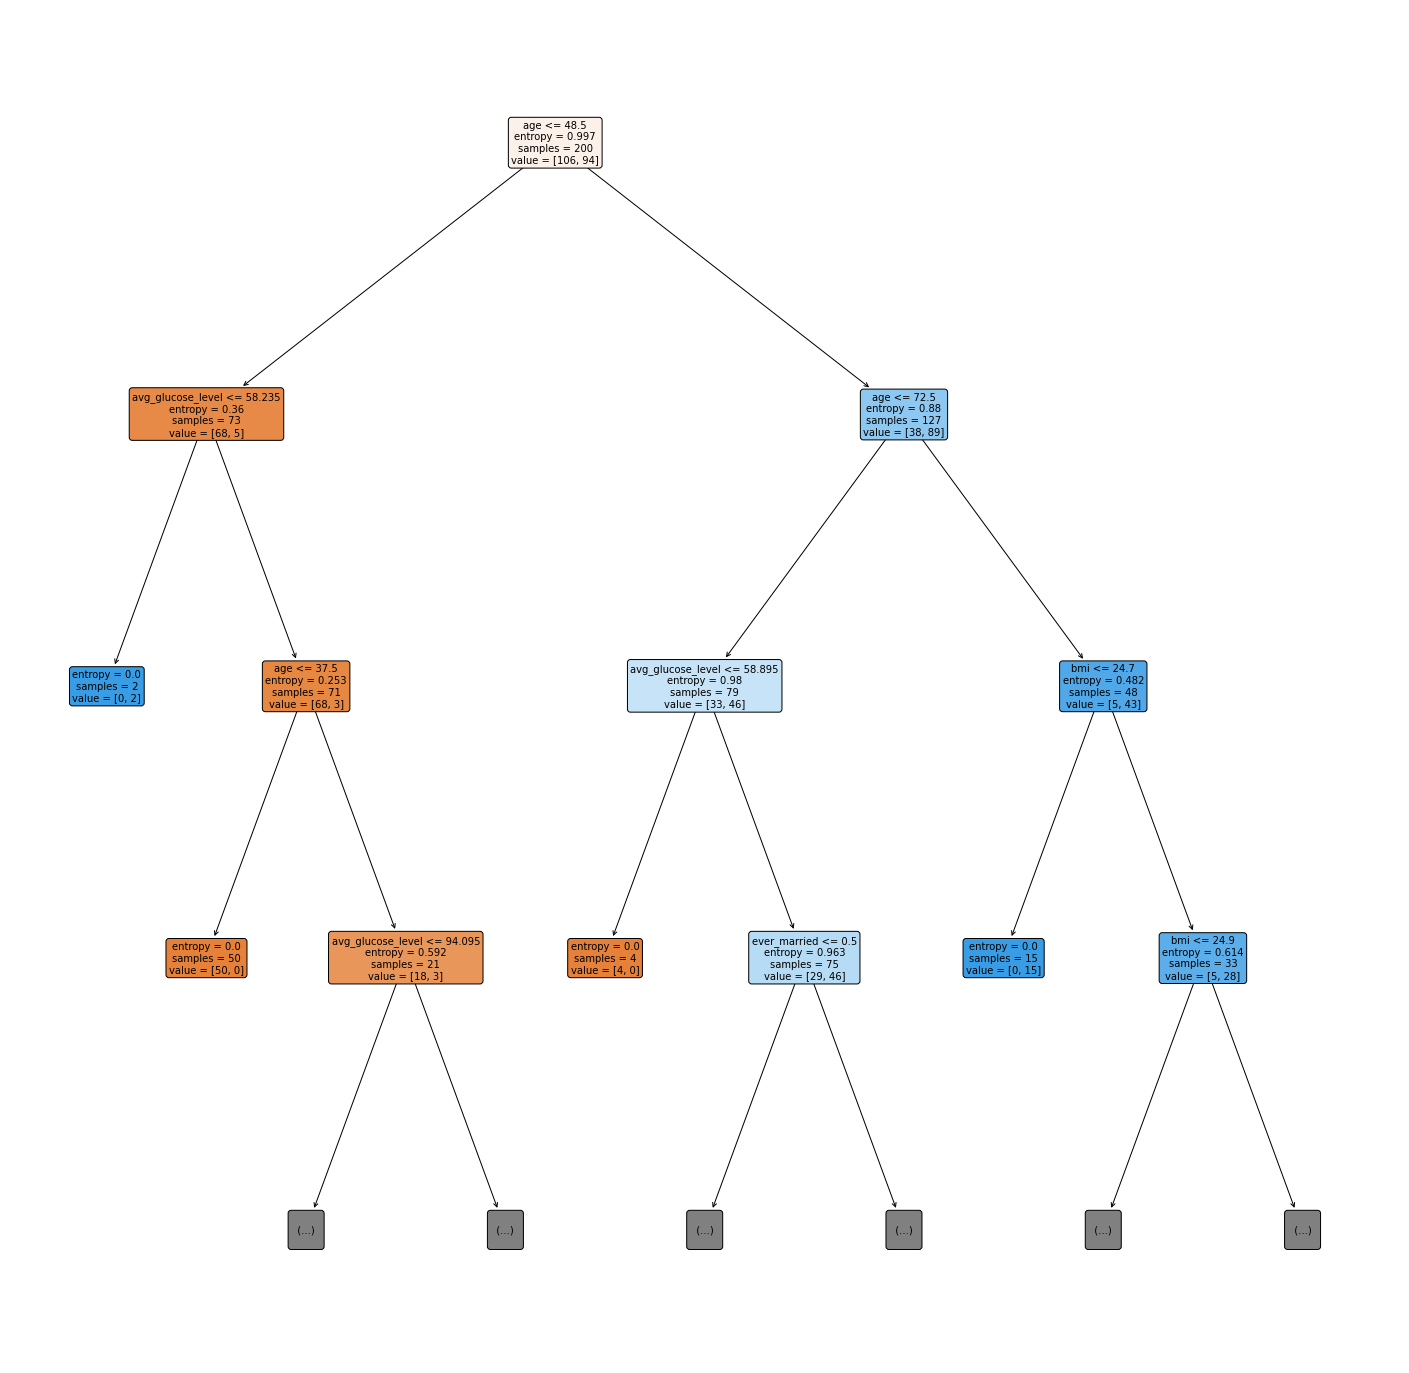

In [ ]:
import graphviz 
from sklearn import tree
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
features = list(data.columns)[:-1]

plt.figure(figsize=(25, 25))
plot_tree(clf, fontsize=10, max_depth=3, feature_names=features, filled=True, rounded=True) # plota a árvore criada

Na árvore de decisão, nota-se que há uma predominância das features bmi, avg_glucose_level e age, sendo elas que apresentam um valor maior para as entropias vistas e em quantidade.

Observando os resultados, é possível notar que há uma recorrência das features avg_glucose_level, age e bmi. Portanto, se baseando nesses testes, é possível concluir que essas features possuem grande importância na classificação.

##Remoção de features para testar sua importância

Agora, vamos realizar alguns testes removendo features que vimos acima que possuem baixa ou alta importância no resultado final da classificação do AVC, a fim de observar se os comportamentos extraídos anteriormente são, de fato, verdadeiros. Para tanto, após a remoção das colunas selecionadas, iremos aplicar um algoritmo de classificação e, enfim, comparar os resultados.

Primeiro, vamos analisar a acurácia média para o cenário em que não foi removida nenhuma feature.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Acurácia sem remoção de colunas
accuracies_original = []
numTests = 10

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_original.append(accuracy)

original = 100 * (sum(accuracies_original) / numTests)
print("Acurácia média: ", 100 * (sum(accuracies_original) / numTests))

Acurácia média:  77.84621278967167


Vamos começar retirando a coluna "age" da tabela em um novo dataset idêntico ao original.

In [ ]:
data_test0 = data.copy()

data_test0.pop("age")

X_aux0 = data_test0.drop("stroke", axis=1)
y_aux0 = data_test0["stroke"]

X_test0 = X_test.copy()
X_test0.pop("age")

# Acurácia sem remoção de colunas
accuracies = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux0, y_aux0, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test0)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies.append(accuracy)

remove_age = 100 * (sum(accuracies) / numTests)
print("Acurácia média: ", remove_age)

Acurácia média:  68.64231644452701


Aqui, vamos remover a coluna 'avg_glucose_level'.

In [ ]:
data_test1 = data.copy()

data_test1.pop("avg_glucose_level")

X_aux1 = data_test1.drop("stroke", axis=1)
y_aux1 = data_test1["stroke"]

X_test1 = X_test.copy()
X_test1.pop("avg_glucose_level")

accuracies_test1 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux1, y_aux1, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test1)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test1.append(accuracy)

remove_glucose = 100 * (sum(accuracies_test1) / numTests)
print("Acurácia média: ", remove_glucose)

Acurácia média:  77.7399804950541


Por fim, removemos a coluna 'bmi'.

In [ ]:
data_test2 = data.copy()

data_test2.pop("bmi")

X_aux2 = data_test2.drop("stroke", axis=1)
y_aux2 = data_test2["stroke"]

X_test2 = X_test.copy()
X_test2.pop("bmi")

accuracies_test2 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux2, y_aux2, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test2)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test2.append(accuracy)

remove_bmi = 100 * (sum(accuracies_test2) / numTests)
print("Acurácia média: ", remove_bmi)

Acurácia média:  78.52424186132912


Agora, vamos analisar como seria se removêssemos features que foram julgadas não importantes pelo algoritmo de prioridades utilizado anteriormente.

Começando pela remoção de 'gender', que de acordo com o algoritmo é a feature com menos importância no resultado final, logo, é esperado que sua remoção impacte pouquissimo na acurácia média original.

In [ ]:
data_test3 = data.copy()

data_test3.pop("gender")

X_aux3 = data_test3.drop("stroke", axis=1)
y_aux3 = data_test3["stroke"]

X_test3 = X_test.copy()
X_test3.pop("gender")

accuracies_test3 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux3, y_aux3, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test3)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test3.append(accuracy)

remove_gender = 100 * (sum(accuracies_test3) / numTests)
print("Acurácia média: ", remove_gender)

Acurácia média:  77.02654065852413


In [ ]:
data_test4 = data.copy()

data_test4.pop("smoking_status")

X_aux4 = data_test4.drop("stroke", axis=1)
y_aux4 = data_test4["stroke"]

X_test4 = X_test.copy()
X_test4.pop("smoking_status")

accuracies_test4 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux4, y_aux4, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test4)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test4.append(accuracy)

remove_smoking = 100 * (sum(accuracies_test4) / numTests)
print("Acurácia média: ", remove_smoking)

Acurácia média:  77.84621278967167


In [ ]:
data_test5 = data.copy()

data_test5.pop("work_type")

X_aux5 = data_test5.drop("stroke", axis=1)
y_aux5 = data_test5["stroke"]

X_test5 = X_test.copy()
X_test5.pop("work_type")

accuracies_test5 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux5, y_aux5, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test5)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test5.append(accuracy)

remove_work_type = 100 * (sum(accuracies_test5) / numTests)
print("Acurácia média: ", remove_work_type)

Acurácia média:  78.80752798030929


Para finalizar, vamos fazer 2 testes. No primeiro, removeremos as 3 features mais importantes para a predição corretas dos algoritmos, enquanto que no segundo removeremos todas as features de menor importância, de forma que possamos analisar se condiz com o que vimos até agora anteriormente.

In [ ]:
data_test6 = data.copy()

data_test6.pop("bmi")
data_test6.pop("avg_glucose_level")
data_test6.pop("age")

X_aux6 = data_test6.drop("stroke", axis=1)
y_aux6 = data_test6["stroke"]

X_test6 = X_test.copy()
X_test6.pop("bmi")
X_test6.pop("avg_glucose_level")
X_test6.pop("age")

accuracies_test6 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux6, y_aux6, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test6)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test6.append(accuracy)

remove_more_important = 100 * (sum(accuracies_test6) / numTests)
print("Acurácia média: ", remove_more_important)


Acurácia média:  67.71641201876191


In [ ]:
data_test7 = data.copy()

data_test7.pop("work_type")
data_test7.pop("smoking_status")
data_test7.pop("ever_married")
data_test7.pop("hypertension")
data_test7.pop("Residence_type")
data_test7.pop("gender")
data_test7.pop("heart_disease")

X_aux7 = data_test7.drop("stroke", axis=1)
y_aux7 = data_test7["stroke"]

X_test7 = X_test.copy()
X_test7.pop("work_type")
X_test7.pop("smoking_status")
X_test7.pop("ever_married")
X_test7.pop("hypertension")
X_test7.pop("Residence_type")
X_test7.pop("gender")
X_test7.pop("heart_disease")

accuracies_test7 = []

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X_aux7, y_aux7, test_size=0.3, random_state=1)   # Separando teste e treino
  model = LogisticRegression(random_state=0, solver="lbfgs", max_iter=10000)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test7)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_test7.append(accuracy)

remove_less_importance = 100 * (sum(accuracies_test7) / numTests)
print("Acurácia média: ", remove_less_importance)


Acurácia média:  79.0606278734965


Agora, com os resultados obtidos, podemos analisar os impactos que a remocao das features tiveram sobre o resultado. Para melhor visualização, usaremos uma tabela com os resultados.

In [ ]:
from IPython.display import display, HTML
data = {'Features':  ['gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status',
                   'gender, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status',
                   'gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, bmi, smoking_status',
                   'gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, smoking_status',
                   'age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status',
                   'gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi',
                   'gender, age, hypertension, heart_disease, ever_married, Residence_type, avg_glucose_level, bmi, smoking_status',
                   'gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_statuss',
                   'age, heart_disease, avg_glucose_level, bmi'],
        'Acuracias': [original, remove_age, remove_glucose, remove_bmi, remove_gender, remove_smoking, remove_work_type, remove_more_important, remove_less_importance]}

df = pd.DataFrame(data)
display(HTML(df.to_html()))


,Features,Acuracias
0,"gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status",77.846213
1,"gender, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status",68.642316
2,"gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, bmi, smoking_status",77.739980
3,"gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, smoking_status",78.524242
4,"age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status",77.026541
5,"gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi",77.846213
6,"gender, age, hypertension, heart_disease, ever_married, Residence_type, avg_glucose_level, bmi, smoking_status",78.807528
7,"gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_statuss",67.716412
8,"age, heart_disease, avg_glucose_level, bmi",79.060628


Tendo em vista os resultados apresentados, é perceptivel que, quando a a remoção de features consideradas importantes, uma de cada vez, o impacto é baixo para os casos das features avg_glucose_level e bmi, mas alto para age, no caso da regressão logística. Em outro cenário, quando há a remoção das três features juntas, vemos o desempenho do algoritmo cair significativamente. O mesmo comportamento não acontece quando há a remoção de atributos considerados menos significantes, onde a acurácia permanece quase a original vista. Assim, podemos concluir que as feautures que apresentaram um maior peso nos outros testes realmente impactam bastante sobre o desempenho na classificação.

##Aplicação dos algoritmos preditivos

Para finalizar este relatório, vamos então, enfim, para o uso dos algoritmos preditivos selecionados na proposta inicial deste trabalho. Com eles, vamos realizar as classificações sobre os dados tratados e manipulados durante as várias etapas do projeto. Com tal predição, vamos então responder se um paciente, dadas suas X características, terá ou não um AVC.

Ao fim da execução dos algoritmos que serão empregados, teremos as acurácias de cada um deles, as quais podemos relacionar e ver se são semelhantes para algoritmos distintos.

###Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
accuracies_MLP = []
numTests = 10

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.3)   # Separando teste e treino
  model = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1, max_iter=1500, solver="sgd", learning_rate='adaptive', learning_rate_init=0.004, power_t=0.7)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_MLP.append(100 * accuracy)

print("Acurácia média Multilayer Perceptron: ", (sum(accuracies_MLP) / numTests))

Acurácia média Multilayer Perceptron:  73.85042725119584


###Random Forest Classifier

In [ ]:
accuracies_RF = []
numTests = 10

for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.3)   # Separando teste e treino
  model = RandomForestClassifier(criterion='entropy', n_estimators=150, max_features="auto")
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_RF.append(100 * accuracy)

print("Acurácia média do Random Forest: ", (sum(accuracies_RF) / numTests))

Acurácia média do Random Forest:  76.6592555612316


###Support Vector Machine

In [ ]:
from sklearn.svm import SVC
accuracies_SVM = []
numTests = 10
for i in range(numTests):
  X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.3)   # Separando teste e treino
  model = SVC(kernel='linear', C=10)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  accuracy = recall_score(y_test, prediction, average='macro')
  accuracies_SVM.append(100 * accuracy)

print("Acurácia média do Support Vector Machine: ", (sum(accuracies_SVM) / numTests))

Acurácia média do Support Vector Machine:  77.79257418845492


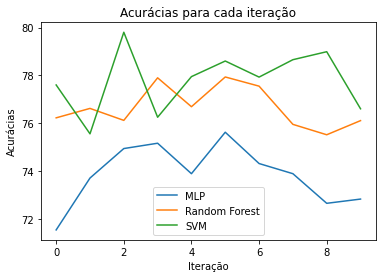

In [ ]:
iteration = [i for i in range(10)]

plt.plot(iteration, accuracies_MLP)
plt.plot(iteration, accuracies_RF)
plt.plot(iteration, accuracies_SVM)
plt.legend(["MLP", "Random Forest", "SVM"])
plt.title("Acurácias para cada iteração")
plt.ylabel("Acurácias")
plt.xlabel("Iteração")
plt.show()

In [ ]:
dici = {"MLP": accuracies_MLP, "Random Forest": accuracies_RF, "SVM": accuracies_SVM}
dataAcFim = pd.DataFrame(dici)
print("Tabela com acurácias")
print(dataAcFim)

Tabela com acurácias
         MLP  Random Forest        SVM
0  71.532648      76.222542  77.598337
1  73.703153      76.617285  75.553801
2  74.937306      76.116310  79.804254
3  75.160219      77.897297  76.247504
4  73.885432      76.688107  77.947221
5  75.620559      77.932708  78.600288
6  74.310361      77.548414  77.927483
7  73.885432      75.949705  78.655436
8  72.646055      75.514327  78.989806
9  72.823109      76.105861  76.601611


Como podemos observar no gráfico acima, o algoritmo do Random Forest Classifier se manteve o de maior acurácia ao longo das 10 rodadas, enquanto que o SVM foi o pior, com aproximadamente 72% de acurácia na predição. Enquanto que, para diferentes valores de random_state na divisão de treino/teste, o SVM pouco se alterou em acurácia, podemos perceber que para o MLP a variância foi maior (manteve-se menos estável esse algoritmo). 